In [1]:
%load_ext autoreload
%autoreload 2

from imports import *
from dynamics import * 
from model import *
from train import *

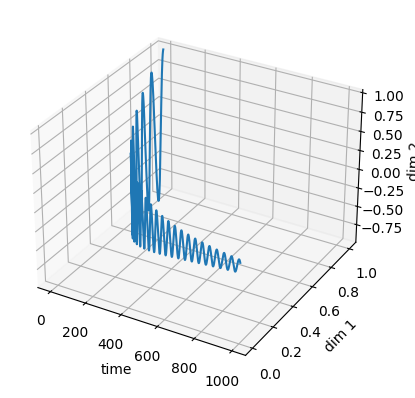

In [2]:
data = dampened_oscillator(m=1.0, c=np.array([100.0, 0.1]), k=np.array([10.0, 10.0]))

plot_3d(data.cpu().numpy())

100%|██████████| 50/50 [01:00<00:00,  1.21s/it]


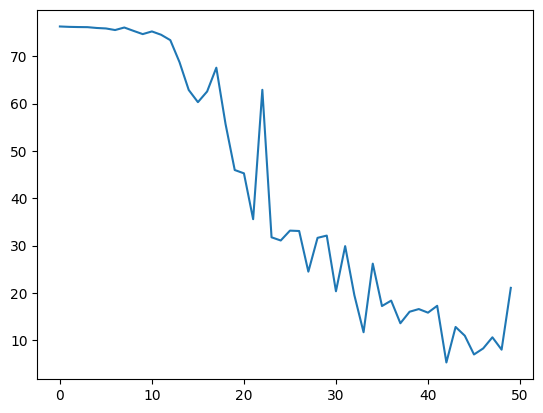

In [4]:
model = EBM(2).cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

losses = []

for e in tqdm(range(50)):
    loss = epoch(iterations=10, model=model, optimizer=optimizer, data=data, bs=100, num_negative_samples=20)
    losses.append(loss)

plt.plot(losses)

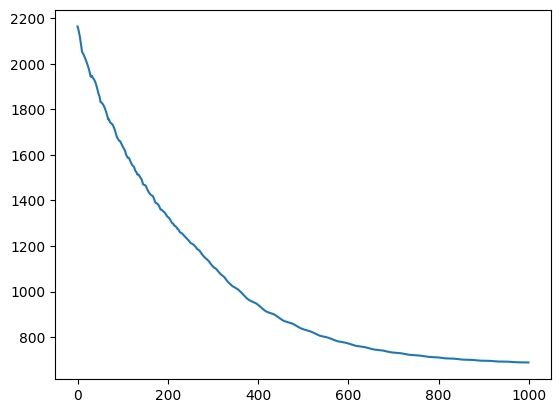

In [5]:
plot_energy_along_trajectory(model, data)

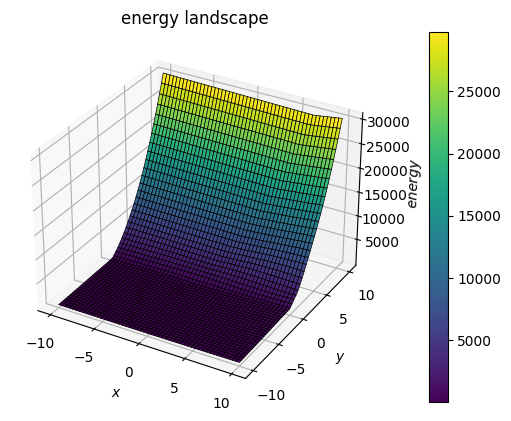

In [6]:
plot_energy_landscape(model)